## Введение в машинное обучение: линейная регрессия

Загрузка исходных данных

In [15]:
from sklearn.datasets import load_boston
import numpy as np

boston_dataset = load_boston()

features = boston_dataset.data
target = boston_dataset.target
# добавим столбец коэффициентов для свободного члена регрессии
ones_column = np.ones(features.shape[0])
ones_column = ones_column[:, np.newaxis]
features = np.append(ones_column, features, axis=1)

print('Фичи')
print(features)
print('\nЦелевая переменная y (первые 20 значений)')
print(target[:20])

# текстовое описание датасета
# print('\n',boston_dataset.DESCR)

Фичи
[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y (первые 20 значений)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2]


## Задание 1

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$


Сравните по евклидовому расстоянию коэффициенты из класса `LinearRegression` и полученные аналитическим способом

In [2]:
from numpy.linalg import inv
import numpy as np

# вычисляем к-ты линейной регрессии w = (X.T * X)^-1 * X.T * y
#w_analytic = np.dot(np.dot(inv(np.dot(features.T, features)), features.T), target)
# understandable way:
part1 = np.dot(features.T, features)  # X.T * X
part2 = inv(part1)  # (X.T * X)^-1
part3 = np.dot(part2, features.T)  # (X.T * X)^-1 * X.T
w_analytic = np.dot(part3, target)  # w = (X.T * X)^-1 * X.T * y


print(f'Аналитически определённые коэффициенты: \n{w_analytic}')

Аналитически определённые коэффициенты: 
[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


Проверка по евклидовой метрике:

In [3]:
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, target)
w_sklearn = np.append(reg.intercept_, reg.coef_[1:])

try:
   linalg_norm = norm(w_sklearn - w_analytic)
   print(f"Коэффициенты, вычисленные моделью sklearn: \n{w_sklearn}")
   print(f"Евклидово расстояние между наборами коэффициентов: {linalg_norm}\n")
except:
   print("!ВАЖНО!: к матрице фичей X нужно добавить столбец, который состоит из единиц")
   print("Это т.н. 'тривиальный' признак $x_0=1$")

Коэффициенты, вычисленные моделью sklearn: 
[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
Евклидово расстояние между наборами коэффициентов: 1.1189695335123838e-11



Проверка на правильность

In [4]:
import unittest


class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(linalg_norm, 0.000000, places=6)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## Задание 2

Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

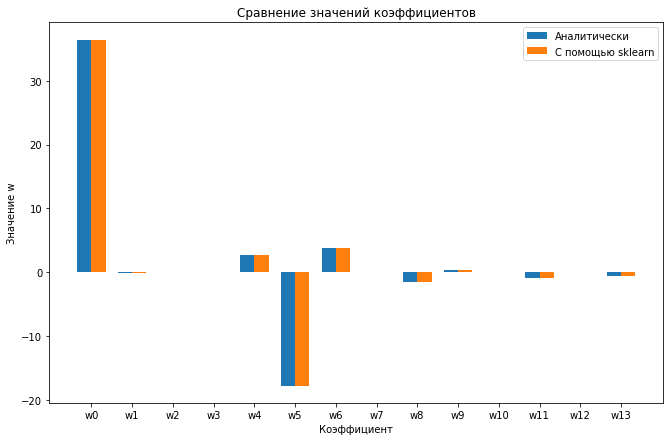

In [5]:
from matplotlib import pyplot as plt

labels = ['w' + str(i) for i in range(features.shape[1])]  # коэффициенты для подписи
x = np.arange(len(labels))  # местоположение
width = 0.35  # и ширина столбиков


plt.figure(figsize=(11, 7))
plt.bar(x - width/2, w_analytic, width, label='Аналитически')
plt.bar(x + width/2, w_sklearn, width, label='С помощью sklearn')

plt.xlabel('Коэффициент')
plt.ylabel('Значение w')
plt.title('Сравнение значений коэффициентов')
plt.xticks(x, labels)
plt.legend()

plt.show()

## Задание 3

Постройте предсказания двумя моделями

* вашей моделью
* моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat{y}-y)$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике c наложением (одна должна "просвечивать" через другую)

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

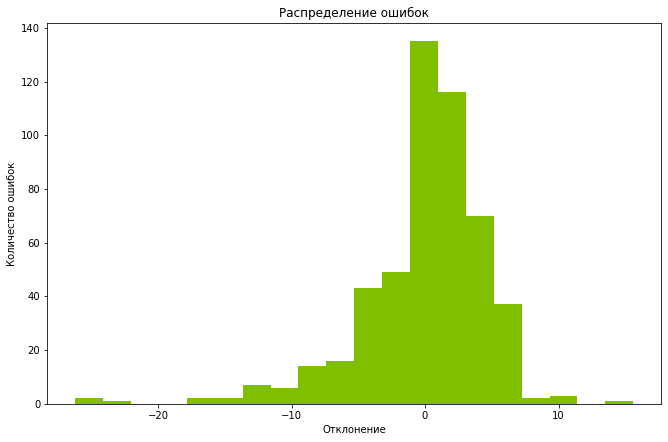

In [14]:
y_pred1 = []
for i in range(features.shape[0]):
    y_pred1.append(np.dot(features[i], w_analytic))


y_pred2 = reg.predict(features)
y_true = target

plt.figure(figsize=(11, 7))
plt.hist(y_pred1 - y_true, alpha=1, color='yellow', bins=20)
plt.hist(y_pred2 - y_true, alpha=0.5, color='green', bins=20)
plt.title('Распределение ошибок')
plt.xlabel('Отклонение')
plt.ylabel('Количество ошибок')
plt.show()